# Exploratory Data Analysis for Real Estate Property Prices

Used data: *https://github.com/npow/centris/blob/master/scraper/data/all_data.csv*

In [1]:
# Import libraries, read data and set seed

import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import pandas as pd 
import scipy as sc
import warnings as wr
import sys
np.random.seed(23)


data = pd.read_csv('all_data.csv', delimiter=',')

## Data Overview

In [2]:
# Let's view the data
data

Unnamed: 0  MlsNumber        Lat        Lng  BuyPrice  ConstructionYear  \
0              0    9041238  45.573887 -73.649079    475000            1959.0   
1              1    9066959  45.533876 -73.672649    200000            2011.0   
2              2    9112562  45.520925 -73.738791   1480000            2007.0   
3              3    9115144  45.573504 -73.649157     85000            1955.0   
4              4    9173179  45.555784 -73.631718    369000            1984.0   
...          ...        ...        ...        ...       ...               ...   
9008        9008   20429233  45.525165 -73.604039   7900000            1942.0   
9009        9009   19127732  45.430508 -73.660292   4400000            1968.0   
9010        9010   14083889  45.610335 -73.561105   3700000            1990.0   
9011        9011   10191214  45.435386 -73.815619   1295000            1922.0   
9012        9012   24962402  45.546910 -73.541058   6700000               NaN   

      WalkScore  NbPieces  NbChambres  NbSallesEaux  ...  Apprentice  No  \
0            88         0           0             0  ...          10  18   
1            63         6           1             0  ...          10  18   
2            18        12           5             1  ...          10  18   
3            87         0           0             0  ...          10  18   
4            49         6           3             1  ...          10  18   
...         ...       ...         ...           ...  ...         ...  ..   
9008         96         0           0             0  ...           5   9   
9009         45         0           0             0  ...          12  23   
9010         63         0           0             0  ...          15  23   
9011         42         0           0             0  ...           8  11   
9012         94         0           0             0  ...          14  24   

      NonImmigrant  Immigrant  french  English  Others  PoliceDist  FireDist  \
0               60         40      64       10      26    0.688929  0.575422   
1               60         40      64       10      26    2.289577  2.054746   
2               60         40      64       10      26    3.062234  1.349094   
3               60         40      64       10      26    0.649360  0.535944   
4               60         40      64       10      26    2.019997  1.123157   
...            ...        ...     ...      ...     ...         ...       ...   
9008            68         32      67       23      10    1.000824  0.870981   
9009            64         36      43       37      20    3.446924  2.539013   
9010            71         29      76        8      16    0.864292  0.832519   
9011            73         27      20       69      11    1.389206  3.997047   
9012            80         20      85        5      10    1.169297  0.766979   

      LivingArea  
0            NaN  
1          720.0  
2            NaN  
3            NaN  
4         1514.0  
...          ...  
9008         NaN  
9009         NaN  
9010         NaN  
9011         NaN  
9012     16544.0  

[9013 rows x 138 columns]

As we can see above the data consists of **9013 rows** and **138 columns**.

In [3]:
# Check column names
for name in data.columns:
    print(name)

Unnamed: 0
MlsNumber
Lat
Lng
BuyPrice
ConstructionYear
WalkScore
NbPieces
NbChambres
NbSallesEaux
NbSallesBains
NbFoyerPoele
NbEquipements
NbGarages
NbStationnements
NbPiscines
NbBordEaux
NbAnimals
NbCultures
IsNewPrice
IsNew
RevenuBrutPotentiel
Outremont
LaSalle
Mont-Royal
Ville-Marie
Le Plateau-Mont-Royal
Hampstead
Le Sud-Ouest
Riviere-des-Prairies-Pointe-aux-Trembles
Lachine
Dorval
Montreal-Nord
Lile-Bizard-Sainte-Genevieve
Kirkland
Dollard-des-Ormeaux
Senneville
Ahuntsic-Cartierville
Cote-Saint-Luc
Saint-Leonard
Montreal-Ouest
Pointe-Claire
Lile-Dorval
Mercier-Hochelaga-Maisonneuve
Cote-des-Neiges-Notre-Dame-de-Grace
Rosemont-La Petite-Patrie
Saint-Laurent
Beaconsfield
Villeray-Saint-Michel-Parc-Extension
Westmount
Montreal-Est
Anjou
Pierrefonds-Roxboro
Sainte-Anne-de-Bellevue
Verdun
Baie-dUrfe
AP
C
ME
VE
I
4X
MA
PP
AU
MPM
TE
2X
TR
3X
MEM
LS
MM
5X
FE
COP
PCI
UNI
PPR
TER
FER
Population
Variation
Density
avgAge
below15
below24
below44
below64
below65
AvgIncome
below50000
below80000
b

There is definately too much variables in the unprocessed data. Some of them need to be abandoned.

In [4]:
# Check some basic info about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9013 entries, 0 to 9012
Columns: 138 entries, Unnamed: 0 to LivingArea
dtypes: float64(9), int64(129)
memory usage: 9.5 MB


There are only numerical variables in our dataframe. This seems to be convenient for us.

In [5]:
# Null/NaN check
pd.set_option('display.max_rows', 138)
data.isnull().sum()

Unnamed: 0                                     0
MlsNumber                                      0
Lat                                            0
Lng                                            0
BuyPrice                                       0
ConstructionYear                            1415
WalkScore                                      0
NbPieces                                       0
NbChambres                                     0
NbSallesEaux                                   0
NbSallesBains                                  0
NbFoyerPoele                                   0
NbEquipements                                  0
NbGarages                                      0
NbStationnements                               0
NbPiscines                                     0
NbBordEaux                                     0
NbAnimals                                      0
NbCultures                                     0
IsNewPrice                                     0
IsNew               

Two of our variables have NaN values: **ConstructionYear**(1415) and **LivingArea**(3930).

In [6]:
def zerosInColumns(df):
    
    output = []
    
    for column_name in df.columns:
        
        column = df[column_name]
        count = (column == 0).sum()
    
        output.append((column_name,count))
    
    output = pd.DataFrame(output, columns=['ColumnName','NumberOfZeros'])
    
    return output

In [7]:
zerosInColumns(data)

ColumnName  NumberOfZeros
0                                  Unnamed: 0              1
1                                   MlsNumber              0
2                                         Lat              0
3                                         Lng              0
4                                    BuyPrice              0
5                            ConstructionYear              0
6                                   WalkScore             33
7                                    NbPieces            581
8                                  NbChambres            639
9                                NbSallesEaux           6865
10                              NbSallesBains            592
11                               NbFoyerPoele           7030
12                              NbEquipements           9013
13                                  NbGarages           5245
14                           NbStationnements           3331
15                                 NbPiscines           7527
16                                 NbBordEaux           8706
17                                  NbAnimals           9013
18                                 NbCultures           9013
19                                 IsNewPrice           8997
20                                      IsNew           9011
21                        RevenuBrutPotentiel           7424
22                                  Outremont           8940
23                                    LaSalle           8645
24                                 Mont-Royal           8849
25                                Ville-Marie           8018
26                      Le Plateau-Mont-Royal           8484
27                                  Hampstead           8996
28                               Le Sud-Ouest           8522
29   Riviere-des-Prairies-Pointe-aux-Trembles           8315
30                                    Lachine           8788
31                                     Dorval           8941
32                              Montreal-Nord           8718
33               Lile-Bizard-Sainte-Genevieve           8860
34                                   Kirkland           8933
35                        Dollard-des-Ormeaux           8815
36                                 Senneville           9006
37                      Ahuntsic-Cartierville           8536
38                             Cote-Saint-Luc           8914
39                              Saint-Leonard           8832
40                             Montreal-Ouest           8985
41                              Pointe-Claire           8897
42                                Lile-Dorval           9013
43              Mercier-Hochelaga-Maisonneuve           8264
44        Cote-des-Neiges-Notre-Dame-de-Grace           8624
45                  Rosemont-La Petite-Patrie           8528
46                              Saint-Laurent           8580
47                               Beaconsfield           8930
48       Villeray-Saint-Michel-Parc-Extension           8520
49                                  Westmount           8934
50                               Montreal-Est           8968
51                                      Anjou           8829
52                        Pierrefonds-Roxboro           8693
53                    Sainte-Anne-de-Bellevue           8989
54                                     Verdun           8586
55                                 Baie-dUrfe           8977
56                                         AP           4588
57                                          C           8830
58                                         ME           7622
59                                         VE           8789
60                                          I           8984
61                                         4X           8846
62                                         MA           8894
63                                         PP           8475
64                                         AU           8823
65       

There are a lot of columns with a great amount of 0 values. We have to check whether this columns are categorical. If not, we can drop them freely.

In [8]:
def countUnique4Columns(df):
    
    output = []
    
    for column_name in df.columns:
        
        column = df[column_name]
        unique = len(column.unique())
    
        output.append((column_name,unique))
    
    output = pd.DataFrame(output, columns=['ColumnName','NumberOfUnique'])
    
    return output

In [9]:
countUnique4Columns(data)

ColumnName  NumberOfUnique
0                                  Unnamed: 0            9013
1                                   MlsNumber            9008
2                                         Lat            8065
3                                         Lng            8062
4                                    BuyPrice            1842
5                            ConstructionYear             146
6                                   WalkScore             101
7                                    NbPieces              34
8                                  NbChambres              13
9                                NbSallesEaux               4
10                              NbSallesBains               8
11                               NbFoyerPoele               5
12                              NbEquipements               1
13                                  NbGarages               6
14                           NbStationnements               4
15                                 NbPiscines               6
16                                 NbBordEaux               2
17                                  NbAnimals               1
18                                 NbCultures               1
19                                 IsNewPrice               2
20                                      IsNew               2
21                        RevenuBrutPotentiel             806
22                                  Outremont               2
23                                    LaSalle               2
24                                 Mont-Royal               2
25                                Ville-Marie               2
26                      Le Plateau-Mont-Royal               2
27                                  Hampstead               2
28                               Le Sud-Ouest               2
29   Riviere-des-Prairies-Pointe-aux-Trembles               2
30                                    Lachine               2
31                                     Dorval               2
32                              Montreal-Nord               2
33               Lile-Bizard-Sainte-Genevieve               2
34                                   Kirkland               2
35                        Dollard-des-Ormeaux               2
36                                 Senneville               2
37                      Ahuntsic-Cartierville               2
38                             Cote-Saint-Luc               2
39                              Saint-Leonard               2
40                             Montreal-Ouest               2
41                              Pointe-Claire               2
42                                Lile-Dorval               1
43              Mercier-Hochelaga-Maisonneuve               2
44        Cote-des-Neiges-Notre-Dame-de-Grace               2
45                  Rosemont-La Petite-Patrie               2
46                              Saint-Laurent               2
47                               Beaconsfield               2
48       Villeray-Saint-Michel-Parc-Extension               2
49                                  Westmount               2
50                               Montreal-Est               2
51                                      Anjou               2
52                        Pierrefonds-Roxboro               2
53                    Sainte-Anne-de-Bellevue               2
54                                     Verdun               2
55                                 Baie-dUrfe               2
56                                         AP               2
57                                          C               2
58                                         ME               2
59                                         VE               2
60                                          I               2
61                                         4X               2
62                                         MA               2
63                                         PP               2
64   

Okay, most of the variables where there is a lot of 0 values are categorical but there are also variables that doesn't implement any information as: **NbEquipements**, **NbAnimals**, **NbCultures**, **Lile-Dorval**, **FE**, **FER**. 

## Spliting Data Into Train and Valid Sample

In [10]:
# Stratifing the data into train and valid sample

from verstack.stratified_continuous_split import scsplit
from sklearn.metrics import mean_absolute_percentage_error

train, valid = scsplit(data,stratify=data['BuyPrice'],random_state=42)

In [11]:
# View train sample
train

Unnamed: 0  MlsNumber        Lat        Lng  BuyPrice  ConstructionYear  \
7946        7946   22189458  45.531556 -73.549280    439000            1885.0   
6558        6558   19887310  45.536207 -73.554527    258891               NaN   
8480        8480    9684659  45.610232 -73.558511    599000            1966.0   
6583        6583   20525623  45.526168 -73.559699    235500            2010.0   
4198        4198   11102864  45.652510 -73.564165    325000            1992.0   
...          ...        ...        ...        ...       ...               ...   
8540        8540   16422023  45.538063 -73.581971    749900            1929.0   
3949        3949   24136434  45.489967 -73.857452    250000               NaN   
6635        6635   21718161  45.507325 -73.568807    479000            2010.0   
2439        2439   21153258  45.473798 -73.582267    279900            2004.0   
2983        2983   18054442  45.613250 -73.535451    184400            2009.0   

      WalkScore  NbPieces  NbChambres  NbSallesEaux  ...  Apprentice  No  \
7946         90         3           1             0  ...           6  11   
6558         92         5           2             0  ...           6  11   
8480         65         7           3             0  ...          15  23   
6583         95         5           1             1  ...           6  11   
4198         54         8           4             0  ...          17  27   
...         ...       ...         ...           ...  ...         ...  ..   
8540         93         6           3             1  ...           5   9   
3949         58         6           2             0  ...           9  15   
6635        100         5           2             1  ...           6  11   
2439         92         4           1             0  ...          10  24   
2983         43         5           2             0  ...          14  24   

      NonImmigrant  Immigrant  french  English  Others  PoliceDist  FireDist  \
7946            57         43      54       27      19    2.130840  0.778308   
6558            57         43      54       27      19    2.003813  0.938470   
8480            71         29      76        8      16    0.720666  0.803222   
6583            57         43      54       27      19    1.212773  0.255386   
4198            77         23      72       16      12    2.750354  0.066618   
...            ...        ...     ...      ...     ...         ...       ...   
8540            68         32      67       23      10    1.490094  0.909339   
3949            61         39      32       47      21    0.462156  0.703272   
6635            57         43      54       27      19    0.803800  0.556328   
2439            74         26      61       24      15    1.141713  0.516199   
2983            80         20      85        5      10    1.642484  1.652683   

      LivingArea  
7946         NaN  
6558      935.00  
8480         NaN  
6583      745.00  
4198     1792.00  
...          ...  
8540     3729.00  
3949      984.00  
6635      989.00  
2439      735.18  
2983         NaN  

[6309 rows x 138 columns]

In [12]:
# View valid sample
valid

Unnamed: 0  MlsNumber        Lat        Lng  BuyPrice  ConstructionYear  \
7871        7871   28160695  45.428723 -73.627712    459000            1967.0   
3008        3008   18929205  45.559411 -73.535670    199000            1906.0   
2326        2326   16128866  45.460131 -73.590642    324000               NaN   
4323        4323   15340128  45.661547 -73.564805    209000            1994.0   
4223        4223   11881159  45.652368 -73.559259    419000            1988.0   
...          ...        ...        ...        ...       ...               ...   
8701        8701   26242714  45.629399 -73.598811    789000            1988.0   
8588        8588   18627882  45.453386 -73.579513    585000            1947.0   
6542        6542   19630329  45.516054 -73.554942    354000            2005.0   
6333        6333   14974373  45.502827 -73.567162    358000               NaN   
3122        3122   23552874  45.592911 -73.520447    279000               NaN   

      WalkScore  NbPieces  NbChambres  NbSallesEaux  ...  Apprentice  No  \
7871         80         5           3             0  ...          12  23   
3008         75         6           1             0  ...          14  24   
2326         84         5           3             0  ...          10  24   
4323         39         7           2             0  ...          17  27   
4223         46        11           5             1  ...          17  27   
...         ...       ...         ...           ...  ...         ...  ..   
8701         47         3           1             0  ...          17  27   
8588         74         6           3             0  ...           9  17   
6542         99         6           2             0  ...           6  11   
6333        100         4           1             0  ...           6  11   
3122         70         8           3             0  ...          14  24   

      NonImmigrant  Immigrant  french  English  Others  PoliceDist  FireDist  \
7871            64         36      43       37      20    1.544801  0.308317   
3008            80         20      85        5      10    0.846824  0.586674   
2326            74         26      61       24      15    0.596036  0.515703   
4323            77         23      72       16      12    3.563620  1.011210   
4223            77         23      72       16      12    2.993993  0.315242   
...            ...        ...     ...      ...     ...         ...       ...   
8701            77         23      72       16      12    1.055830  2.222683   
8588            76         24      65       21      14    0.807793  1.303902   
6542            57         43      54       27      19    0.671843  1.019335   
6333            57         43      54       27      19    1.038459  0.126776   
3122            80         20      85        5      10    1.991819  0.955859   

      LivingArea  
7871         NaN  
3008      666.00  
2326     1456.00  
4323     1028.65  
4223         NaN  
...          ...  
8701         NaN  
8588         NaN  
6542         NaN  
6333      501.00  
3122         NaN  

[2704 rows x 138 columns]

## EDA for Train Sample

In [13]:
train.describe()

Unnamed: 0     MlsNumber          Lat          Lng      BuyPrice  \
count  6309.000000  6.309000e+03  6309.000000  6309.000000  6.309000e+03   
mean   4494.637185  1.886492e+07    45.525733   -73.624637  4.680185e+05   
std    2601.520185  5.844926e+06     0.062596     0.096459  4.419475e+05   
min       0.000000  8.459190e+06    45.402755   -73.962709  4.000000e+00   
25%    2249.000000  1.374407e+07    45.479224   -73.651805  2.590000e+05   
50%    4484.000000  1.890541e+07    45.518030   -73.595889  3.660000e+05   
75%    6741.000000  2.396407e+07    45.560715   -73.561161  5.350000e+05   
max    9011.000000  2.899982e+07    45.708072   -73.296129  7.900000e+06   

       ConstructionYear    WalkScore     NbPieces   NbChambres  NbSallesEaux  \
count       5326.000000  6309.000000  6309.000000  6309.000000   6309.000000   
mean        1973.894668    71.829133     6.203836     2.370582      0.259629   
std           34.097094    22.584688     3.371612     1.304812      0.481544   
min         1657.000000     0.000000     0.000000     0.000000      0.000000   
25%         1954.000000    59.000000     4.000000     2.000000      0.000000   
50%         1982.000000    78.000000     6.000000     2.000000      0.000000   
75%         2005.000000    90.000000     8.000000     3.000000      0.000000   
max         2014.000000   100.000000    50.000000    11.000000      3.000000   

       ...   Apprentice           No  NonImmigrant    Immigrant       french  \
count  ...  6309.000000  6309.000000   6309.000000  6309.000000  6309.000000   
mean   ...     9.973688    18.539547     65.897607    33.674433    56.686321   
std    ...     3.992058     7.276684     11.568767    10.956457    19.298141   
min    ...     0.000000     0.000000      0.000000     0.000000     0.000000   
25%    ...     6.000000    11.000000     57.000000    23.000000    43.000000   
50%    ...    10.000000    18.000000     68.000000    32.000000    61.000000   
75%    ...    12.000000    24.000000     77.000000    43.000000    67.000000   
max    ...    24.000000    35.000000     91.000000    54.000000    93.000000   

           English       Others   PoliceDist     FireDist    LivingArea  
count  6309.000000  6309.000000  6309.000000  6309.000000   3563.000000  
mean     24.455381    18.430338     1.775458     1.107252   1275.048731  
std      17.146015     8.873938     1.304409     0.768059   1302.949690  
min       0.000000     0.000000     0.033435     0.001409      1.000000  
25%       9.000000    11.000000     0.876301     0.606616    793.500000  
50%      23.000000    16.000000     1.507895     0.922437    999.970000  
75%      29.000000    22.000000     2.243588     1.418935   1344.000000  
max      78.000000    37.000000    17.867831    16.681547  37910.490000  

[8 rows x 138 columns]

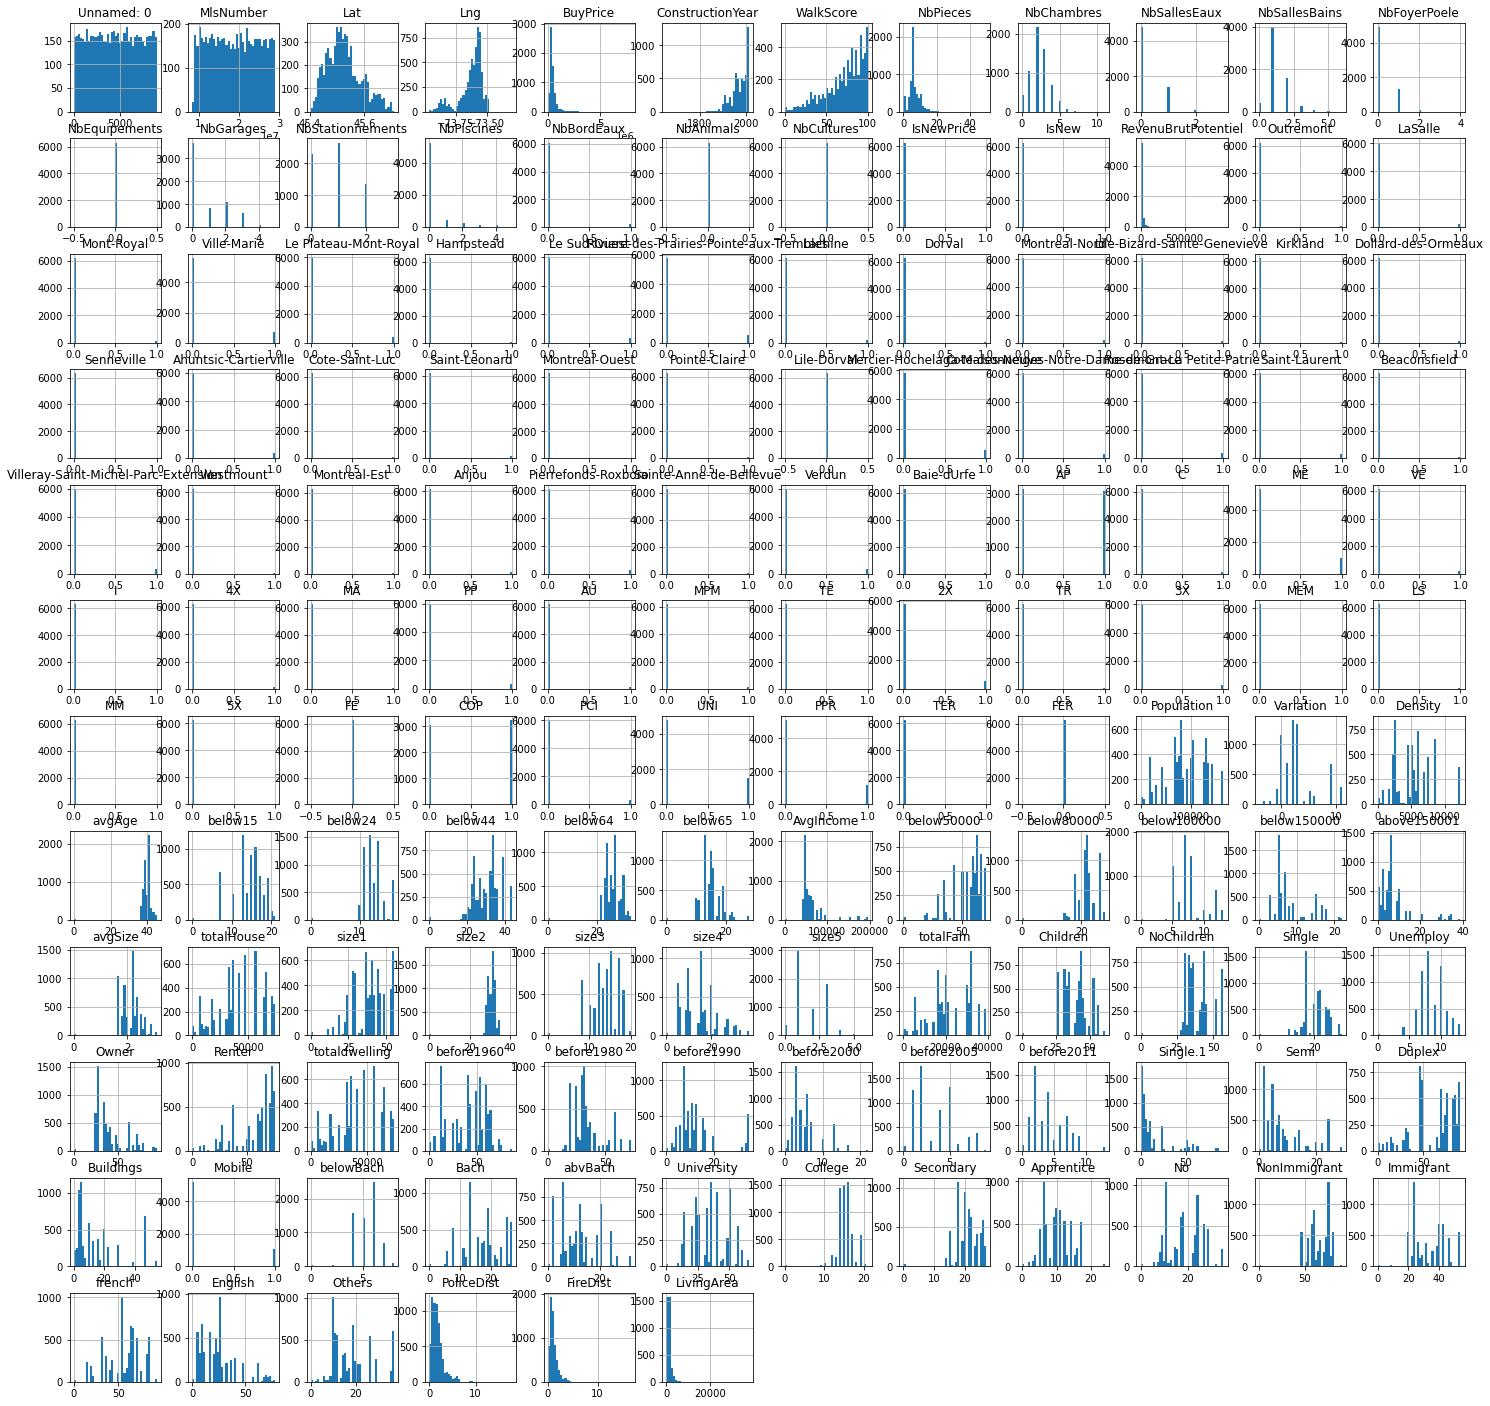

In [14]:
# Distribution check
train.hist(bins = 40, figsize=(25, 25))
plt.show()

To better understand distribution we need to drop categorical columns for a while.

In [15]:
def continuousDist4Columns(df,n):
    
    # n - lower limit for unique values in column
    
    unique_count = countUnique4Columns(df)
    unique_count = unique_count[unique_count["NumberOfUnique"] > n]
    
    columns = unique_count.ColumnName
    
    output = df[columns]
    
    output.hist(bins = 40, figsize=(25, 25))
    plt.show()
    

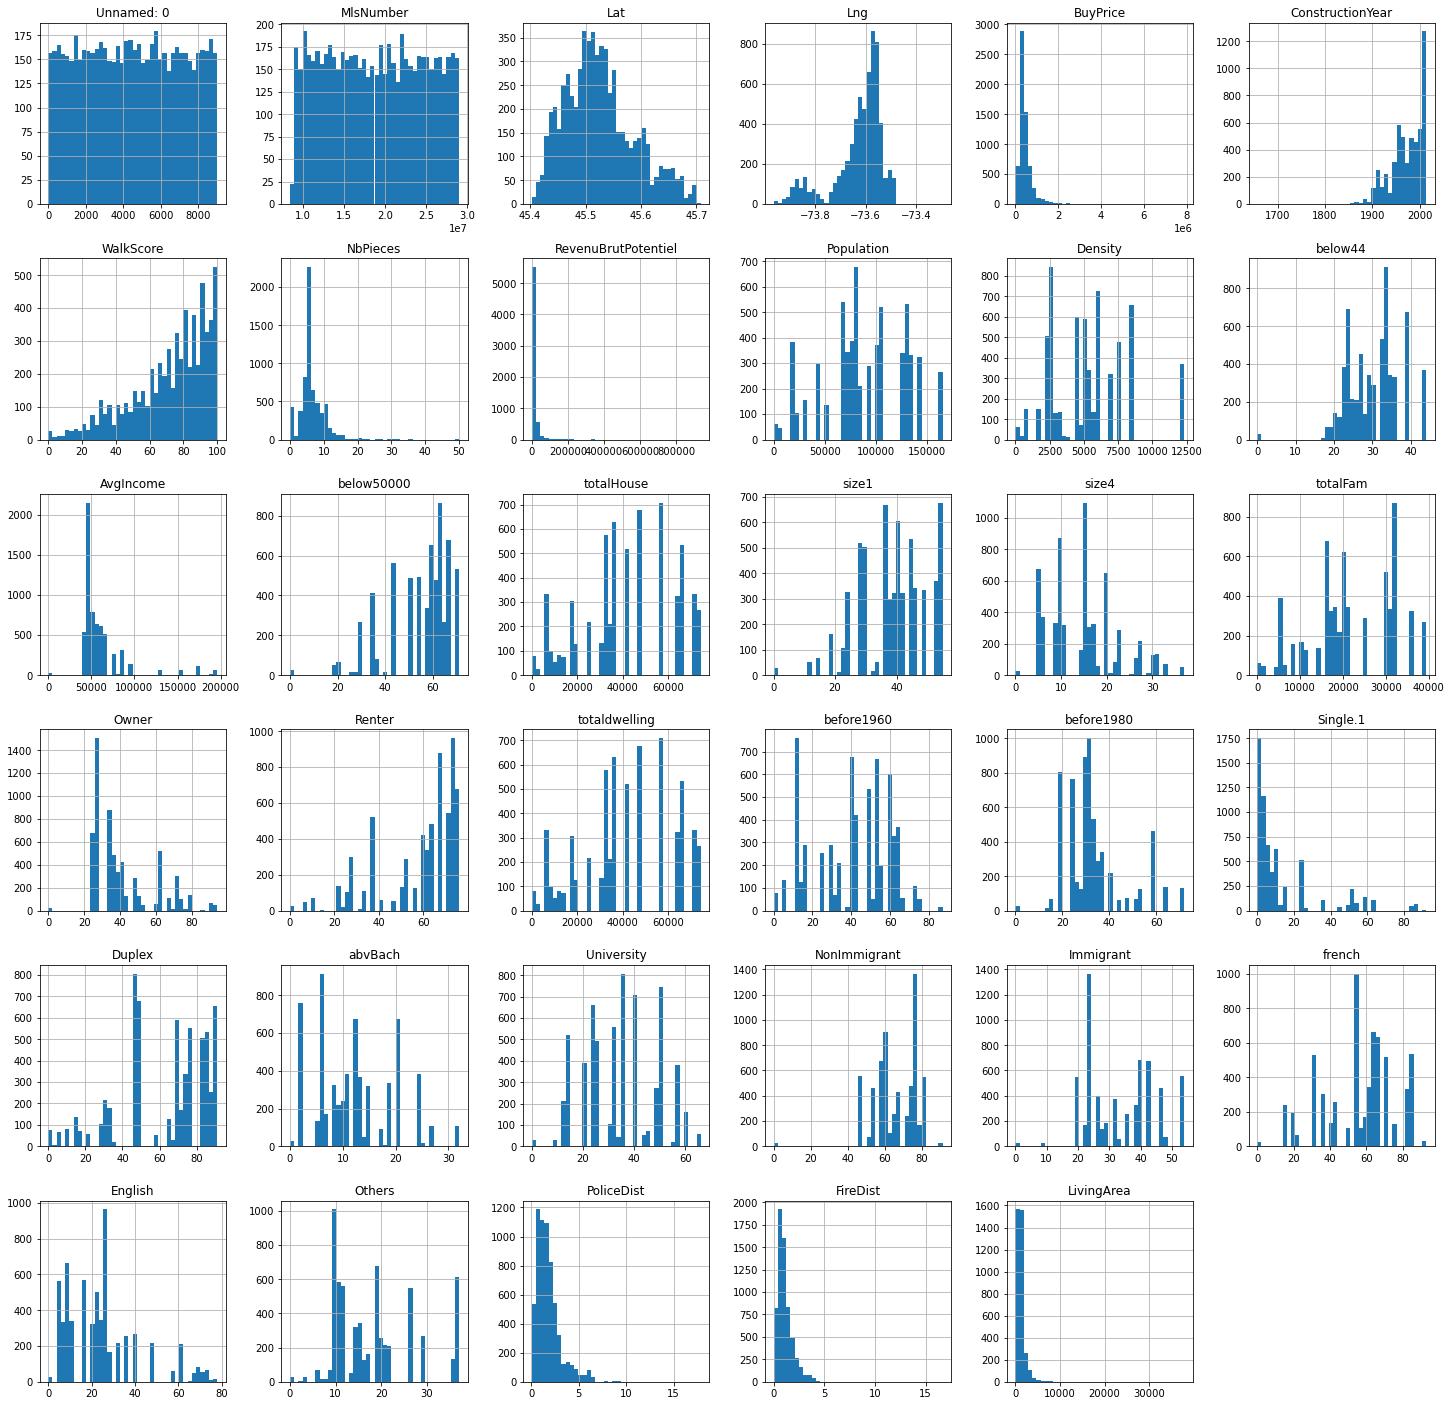

In [16]:
continuousDist4Columns(train,20)

There are a few Gauss, Gamma and expotential distributions. Possibly, we will need to trasnpose some variables.

In [17]:
def checkStrongCorrelations(df,corr):
    
    length = len(df.columns)
    
    output = []
    
    for i in range(1,length):
        for j in range(i+1,length):
            
            column1 = df.iloc[:,i]
            column2 = df.iloc[:,j]
            correlation = column1.corr(column2)
            
            if abs(correlation) > corr:
                
                output.append((column1.name,column2.name,correlation))
                
    output = pd.DataFrame(output, columns=['Column1','Column2','Correlation'])
    
    return output

In [18]:
checkStrongCorrelations(train,0.85)

Column1        Column2  Correlation
0    Baie-dUrfe         avgAge    -0.851199
1            AP            COP     0.957792
2            TR            TER     0.954752
3    Population     totalHouse     0.958279
4    Population       totalFam     0.972802
5    Population  totaldwelling     0.958479
6       below15          size3     0.880418
7       below15       Children     0.888388
8       below44          size1     0.892443
9     AvgIncome    above150001     0.909912
10   below50000    below150000    -0.873653
11   below50000          Owner    -0.863528
12   below50000         Renter     0.954753
13  below100000    below150000     0.883135
14  below100000          Owner     0.873937
15  below150000          Owner     0.960553
16  below150000         Renter    -0.907305
17  below150000       Single.1     0.908610
18      avgSize          size3     0.935542
19      avgSize          size4     0.957893
20      avgSize       Children     0.962574
21   totalHouse       totalFam     0.873968
22   totalHouse  totaldwelling     0.999973
23        size1          size4    -0.911127
24        size1     NoChildren     0.870074
25        size1         Renter     0.886730
26        size3          size4     0.908558
27        size3       Children     0.925729
28        size4       Children     0.953012
29        size4          Owner     0.879906
30     totalFam  totaldwelling     0.873982
31        Owner         Renter    -0.931241
32        Owner       Single.1     0.918226
33       Renter       Single.1    -0.889843
34   before1990     before2000     0.882397
35         Bach        abvBach     0.945811
36         Bach     University     0.985900
37         Bach     Apprentice    -0.878867
38         Bach             No    -0.878048
39      abvBach     University     0.984013
40      abvBach     Apprentice    -0.886717
41      abvBach             No    -0.854079
42   University     Apprentice    -0.896375
43   University             No    -0.878394
44   Apprentice             No     0.889156
45    Immigrant         Others     0.871858

In [19]:
# Correlations check overall
def corrPlot(df):
    
    num_features = [name for name in df.columns if pd.api.types.is_numeric_dtype(df[name])]

    plt.figure(figsize=(100, 100))
    heatmap = sns.heatmap(df[num_features].corr(), annot=True, vmin=-1, vmax=1, cmap="BrBG")
    plt.show()
    
    return 

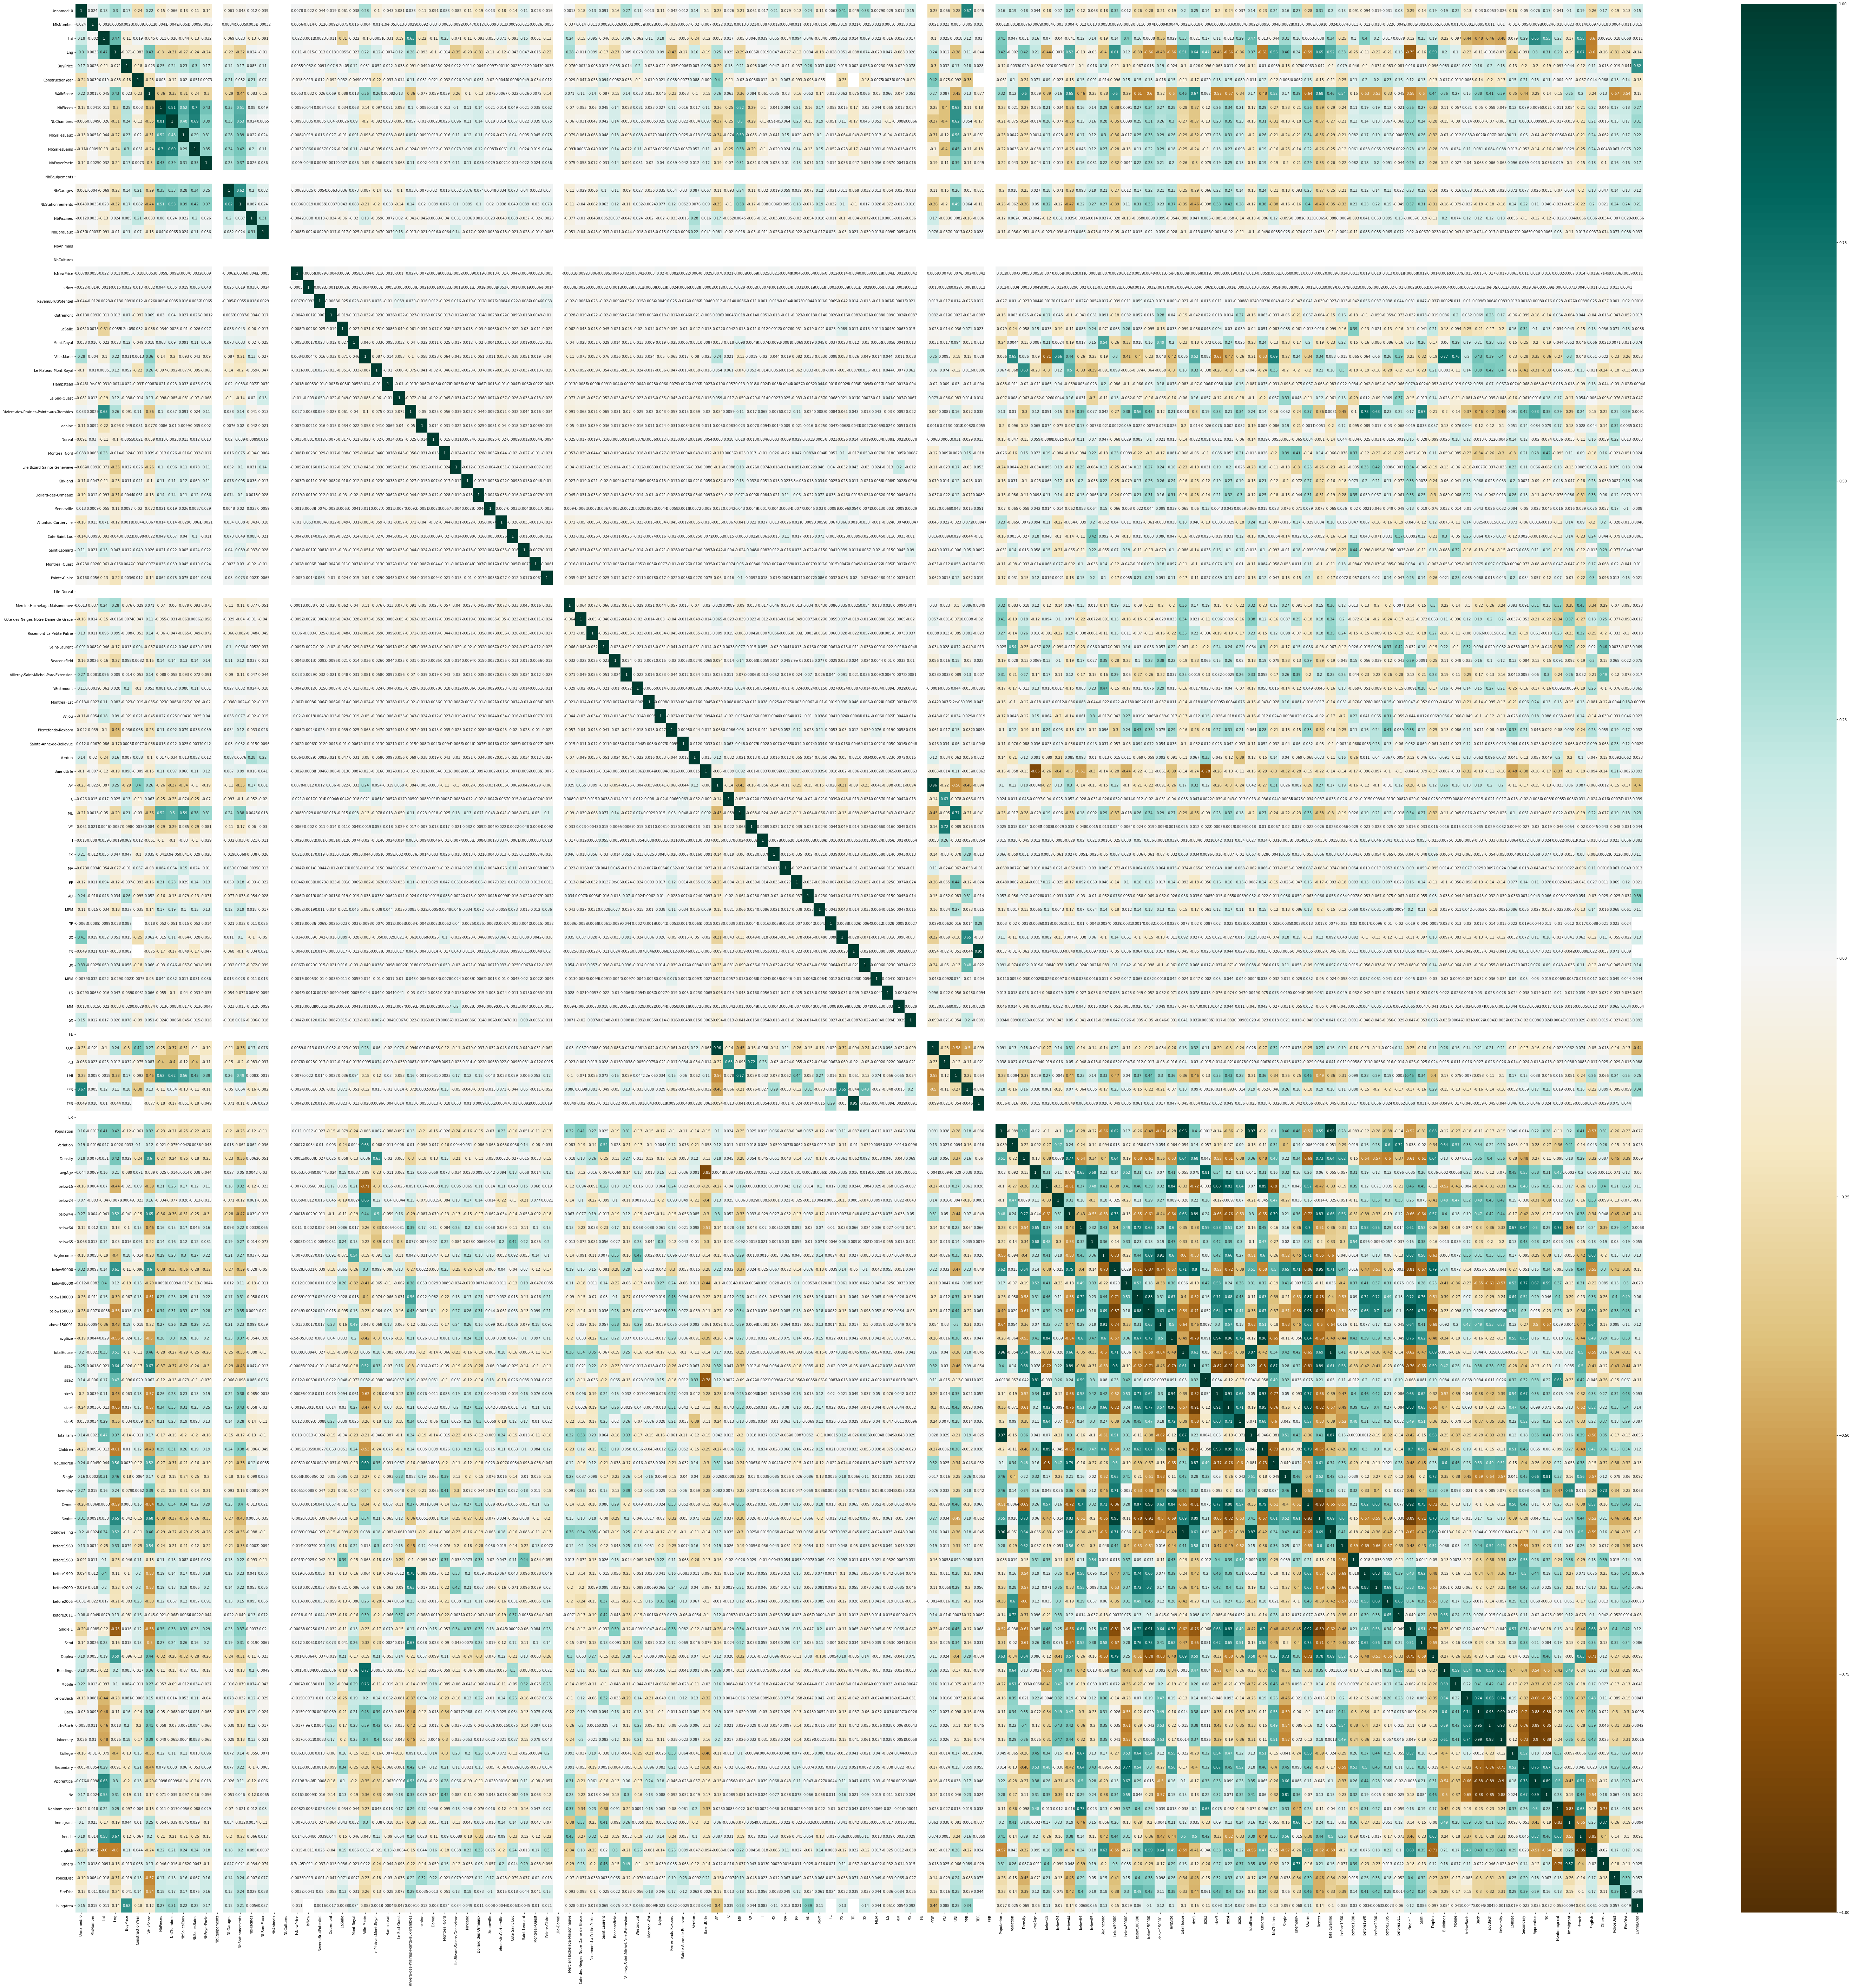

In [20]:
corrPlot(train) # need to view bigger png

In [21]:
def strongestCorr4SpecifiedColumn(df,columnName):
    
    output = []
    
    column = df[columnName]
    
    for col in df:
        
        corr = column.corr(df[col])
        output.append((col,corr))
        
    output = pd.DataFrame(output, columns=['ColumnName','Correlation'])
    output = output.sort_values(by='Correlation',key=abs,ascending=False)
    
    return output
    

In [22]:
# Checking strongest correlations for 'BuyPrice' variable
strongestCorr4SpecifiedColumn(train,"BuyPrice")

ColumnName  Correlation
4                                    BuyPrice     1.000000
137                                LivingArea     0.621987
10                              NbSallesBains     0.297908
75                                        COP    -0.297326
56                                         AP    -0.287297
64                                         AU     0.264055
7                                    NbPieces     0.245209
8                                  NbChambres     0.238075
9                                NbSallesEaux     0.228703
58                                         ME     0.206191
124                                   abvBach     0.202916
49                                  Westmount     0.202481
128                                Apprentice    -0.201467
127                                 Secondary    -0.197696
95                                above150001     0.191724
92                                 below80000    -0.189296
129                                        No    -0.186179
106                                    Single    -0.184375
5                            ConstructionYear    -0.183626
90                                  AvgIncome     0.180874
125                                University     0.180295
78                                        PPR     0.175081
14                           NbStationnements     0.171057
11                               NbFoyerPoele     0.168901
0                                  Unnamed: 0     0.167648
77                                        UNI     0.165674
123                                      Bach     0.157644
13                                  NbGarages     0.140122
103                                  totalFam    -0.138735
57                                          C     0.132578
126                                   College    -0.131101
132                                    french    -0.122410
81                                 Population    -0.120881
24                                 Mont-Royal     0.115573
2                                         Lat    -0.110173
16                                 NbBordEaux     0.107887
133                                   English     0.107200
91                                 below50000    -0.106826
113                                before1990    -0.103604
88                                    below64    -0.099633
110                             totaldwelling    -0.099629
97                                 totalHouse    -0.099508
59                                         VE    -0.097729
55                                 Baie-dUrfe     0.097657
130                              NonImmigrant    -0.096536
99                                      size2    -0.096306
119                                    Duplex    -0.095893
29   Riviere-des-Prairies-Pointe-aux-Trembles    -0.091362
84                                     avgAge    -0.088829
66                                         TE     0.086671
15                                 NbPiscines     0.085111
121                                    Mobile     0.084036
115                                before2005    -0.083310
120                                 Buildings     0.082911
116                                before2011    -0.080740
122                                 belowBach     0.080516
107                                  Unemploy    -0.079197
111                                before1960     0.078797
73                                         5X     0.077695
43              Mercier-Hochelaga-Maisonneuve    -0.075845
114                                before2000    -0.074333
3                                         Lng    -0.071271
22                                  Outremont     0.069822
60                                          I     0.068545
93                                below100000    -0.066901
100                                     size3    -0.063202
69                                         3X     0.056247
47                     

*To drop*: Baie-dUrfe, COP, TR, totalHouse, totalFam, totaldwelling, size1, size2, size3, size4, above150001, Owner, Renter, Bach, No, Others, NbAnimals, NbEquipements, NbCultures, Lile-Dorval, FE, FER (only suggestions).

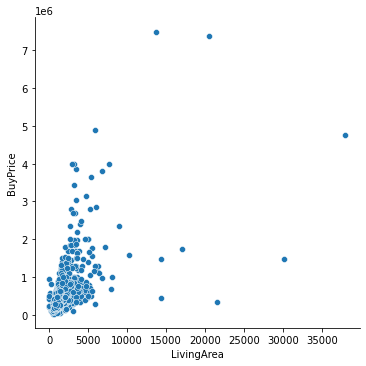

In [23]:
sns.relplot(data = train, y ="BuyPrice", x =train['LivingArea'])
plt.show()

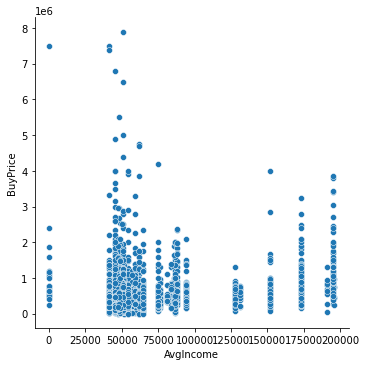

In [24]:
sns.relplot(data = train, y ="BuyPrice", x =train['AvgIncome'])
plt.show()

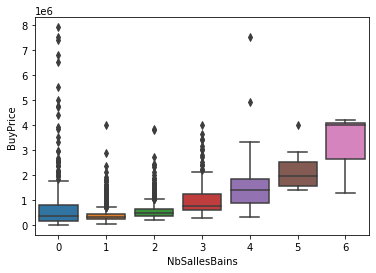

In [25]:
sns.boxplot(data = train, y ="BuyPrice", x =train['NbSallesBains'])
plt.show()

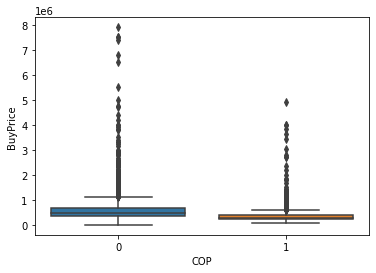

In [26]:
sns.boxplot(data = train, y ="BuyPrice", x =train['COP'])
plt.show()

Interesting is the fact that BuyPrice is the highest where AvgIncome is not that high.